# Align sequences

In [1]:
import json
from pyeed.core import ProteinRecord


# load accession ids from json file
with open("ids.json", "r") as f:
    ids = json.load(f)

sequences = ProteinRecord.get_ids(ids)

Output()

## Multi Sequence Alignment

A multi sequence alignment can be calculated by creating a `MSA` object and passing a list of `ProteinRecord`. The alignment can be executed by calling the `clustalo` method. In order for the `clustalo` method to work, the PyEED Docker Service must be running. The `clustalo` method will return an `AlignmentResult` containing all input `sequences` and `aligned_sequences`.

Output()

✅ Alignment completed


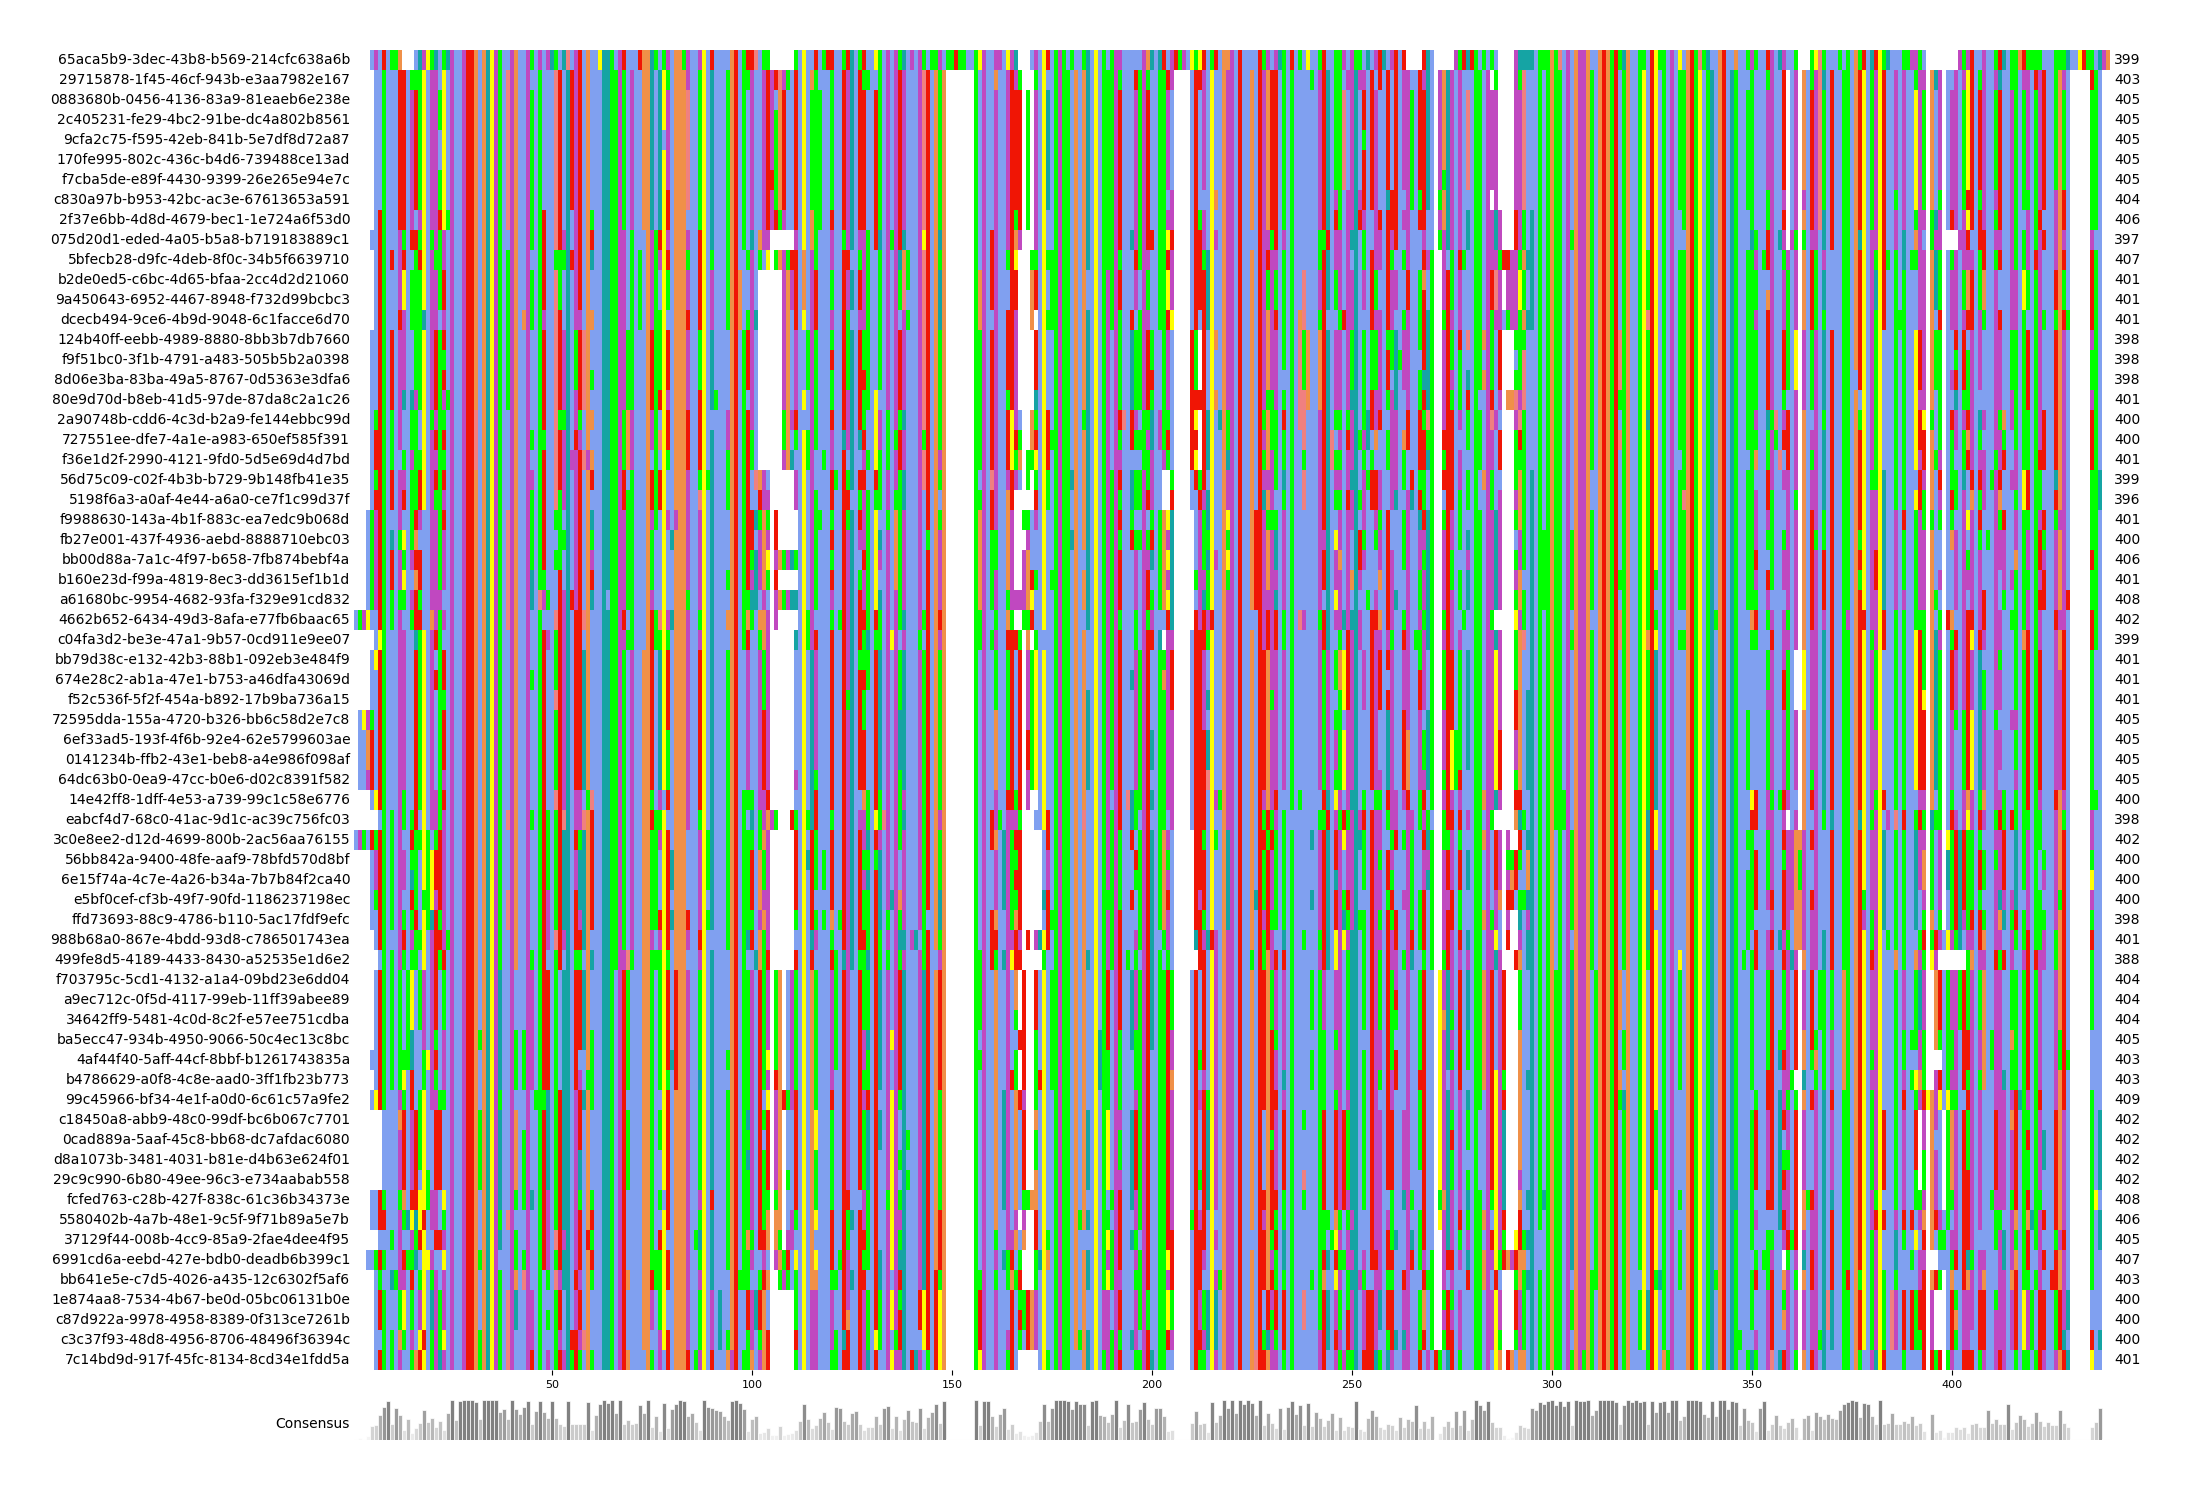

In [2]:
from pyeed.align import MSA

alignment = MSA(sequences=sequences).clustalo()
alignment.visualize()

## Create a HMM profile

To create a hidden markov model profile, you can use the `HMM` class. This method receives a `MSA` object to create the model. To check if a sequence belongs to the profile, you can use the `search` method. This method takes a `ProteinRecord` object and returns a `HMMResult` object containing the `sequence` and the `score` of the sequence in the profile.

In [4]:
from pyeed.align import HMM

model = HMM(name="random profile", alignment=alignment)
hits = model.search(sequence=sequences[0])

In [9]:
alignment.sequences[0]

Sequence(id='85d6e902-3cb0-44f2-947f-54c2a0f220e1', sequence_id='C3MJ04', sequence='MRNINVQLNPLSDIEKLQVELVERKGLGHPDYIADAVAEEASRKLSLYYLKKYGVILHHNLDKTLVVGGQATPRFKGGDVIQPIYIVVAGRATTEVKTESGIEQIPVGTIIIESVKEWIRNNFRYLDAEKHLIVDYKIGKGSTDLVGIFEAGKRVPLSNDTSFGVGFAPFTKLEKLVYETERHLNSKQFKAKLPEVGEDIKVMGLRRGNEVDLTIAMATISELIEDVNHYINVKEQAKNEILDLASKIAPDYDVRIYVNTGDKIDKNILYLTVTGTSAEHGDDGMTGRGNRGVGLITPMRPMSLEATAGKNPVNHVGKLYNVLANLIANKIAQEVKDVKFSQVQVLGQIGRPIDDPLIANVDVITYDGKLNDETKNEISGIVDEMLSSFNKLTELILEGKATLF', json_ld_type=['Sequence'], json_ld_context={'Sequence': 'https://github.com/PyEED/pyeed/Sequence'})